<a href="https://colab.research.google.com/github/pesado-dev/curso_de_dados/blob/main/C%C3%B3pia_de_estatistica_descritiva_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

 Bibliotecas

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
%pip install sidetable #essa biblioteca serve para contar frequência categoricas. E valores faltantes

import numpy as np
import pandas as pd

import sidetable
from scipy import stats #estatica discritiva, referencial, probabilistica

import seaborn as sns #gráficos 2d convencionais
import matplotlib.pyplot as plt #gráficos 2d ou 3d interativos

import plotly.express as px
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Configurações de plots

In [2]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',#codigo de costumização
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

Dataset de exemplo

In [3]:
df_tips = sns.load_dataset('tips')#data set de gorjetas
print(df_tips.shape)#quantas linhas
df_tips.head()#primeiras linhas

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#treinando Dataset de gorjetas

dt_tips = sns.load_dataset('tips')
print(df_tips.shape)
df_tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Introdução

## O que é estatística

A estatística é uma ciência que se dedica à coleta, análise e interpretação de dados.  
Pode ser considerada como a arte de obter insights dos dados e é essencial à **tomada de decisão**.

Divide-se em:

![diagrama estatística](https://github.com/cmcouto-silva/figures/blob/main/statistics/areas_da_estatistica.png?raw=true)


## População vs amostra

![populacao_amostra](https://github.com/cmcouto-silva/figures/blob/main/statistics/populacao_amostra.png?raw=true)

<br/>

Siglas comuns:

| Metric             | Population parameter   | Sample Statistic   |
|:-------------------|:-----------------------|:-------------------|
| size               | $N$                    | $n$                |
| mean               | $\mu$                  | $\bar{x}$          |
| variance           | $\sigma^2$             | $s^2$              |
| standard deviation | $\sigma$               | $s$                |
| correlation        | $\rho$                 | $r$                |

Exemplos: 

In [ ]:
print(df_tips.shape)
df_tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [110]:
df_tips_sample = df_tips.sample(50)#mostra cinquenta linhas aleatorias
print(df_tips_sample.shape)#mostra quantas linhas 
df_tips_sample.head()#primeiras linhas

(50, 7)


,total_bill,tip,sex,smoker,day,time,size
74,14.73,2.20,Female,No,Sat,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
110,14.00,3.00,Male,No,Sat,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2
177,14.48,2.00,Male,Yes,Sun,Dinner,2


## Tipos de variáveis

![tipos_variaveis](https://github.com/cmcouto-silva/figures/blob/main/statistics/tipos_variaveis.png?raw=true)

<br/>

As variáveis categóricas ainda podem ser separadas em:
- Dicotômica ou binária (dummy)
- Policotômica

**Por que saber os tipos de dados?**

Para cada tipo de variável, aplicamos análises diferentes (estatísticas e em modelos de machine learning).

In [ ]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df_tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

# Análise Univariada

![figure book favero](https://github.com/cmcouto-silva/figures/blob/main/statistics/estatisticas_descritivas_univariadas.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).



## Variáveis Numéricas

## Estimativas / Métricas / Medidas

### Posição ou Localização

#### Medidas de tendência central

##### Média

###### Média aritmética

**Considerações:**
- Métrica mais utilizada nos negócios e em modelos de inteligência artifical
- Leva todos os dados em consideração
- Sensível a outliers

<br/>

**Fórmula**:

$$
\text{Mean} = \bar{x} = \frac{\sum_{i=1}^n{x_i}}{n}
$$

In [ ]:
df_tips['tip'].mean()

2.99827868852459

In [ ]:
#treinando função média com df
print(df_tips['tip'].mean()) #primeira forma para calcular a média usando função mean() média
print(df_tips['tip'].agg('mean'))#Também dar pra usar .agg
print(np.sum(df_tips['tip'])/len(df_tips['tip']))#jeito mais dificil

2.99827868852459
2.99827868852459
2.99827868852459


In [ ]:
df_tips['tip'].agg('mean')

2.99827868852459

In [ ]:
np.mean(df_tips['tip'])

2.99827868852459

In [ ]:
np.sum(df_tips['tip']) / len(df_tips['tip'])

2.99827868852459

###### Média ponderada

$$
\text{Weighted Mean} = \bar{x}_w = \frac{\sum_{i=1}^n{x_iw_i}}{\sum_{i=1}^n{w_i}}
$$

In [ ]:
np.average(df_tips['tip'], weights=df_tips['size'])

3.2478309409888357

In [ ]:
#treinando méida ponderada
np.average(df_tips['tip'],weights=df_tips['size'])

3.2478309409888357

###### Trimmed mean

$$
\text{Trimmed Mean} = \bar{x} = \frac{\sum_{i=p+1}^{n-p}{x_i}}{n - 2p}
$$

In [ ]:
values = df_tips['tip'].sort_values().reset_index(drop=True)
values

0       1.00
1       1.00
2       1.00
3       1.00
4       1.01
       ...  
239     6.70
240     6.73
241     7.58
242     9.00
243    10.00
Name: tip, Length: 244, dtype: float64

In [ ]:
p = 10
n = len(values[p:-p])
values[p:-p].sum() / (n - 2*p)

3.1851470588235293

In [ ]:
#treinando timmed mean
values=df_tips['tip'].sort_values().reset_index(drop=True)
print(values)


0       1.00
1       1.00
2       1.00
3       1.00
4       1.01
       ...  
239     6.70
240     6.73
241     7.58
242     9.00
243    10.00
Name: tip, Length: 244, dtype: float64


In [ ]:
#treinando timmed mean 2
p=10
n=len(values[p:-p])
values[p:-p].sum()/(n-2*p) #mostrando os 10 primeiros e os 10 últimos

3.1851470588235293

In [ ]:
#treinando timmed mean jeito mais fácil
stats.trim_mean(values,.1)

2.842704081632653

In [ ]:
#treinando média harmônica 
stats.hmean(values)

2.482252914784503

In [ ]:
values = df_tips['tip'].sort_values().reset_index(drop=True)

p = 10
values[p:-p].sum() / (values.shape[0] - 2*p)
# values[p:-p].sum() / values[10:-10].shape[0]

2.9007589285714284

In [ ]:
stats.trim_mean(values, .1)

2.842704081632653

###### Média harmônica

In [ ]:
# F1-score 
stats.hmean(values)

2.482252914784503

##### Mediana

# A mediana separa os dados em duas metades: 50% dos dados estão abaixo do valor da mediana, e os outros 50% estão acima deste valor.  
A mediana é uma métrica útil principalmente quando queremos ignorar a presença de outliers.

<br/>

**Fórmula:**

Se n é ímpar:
$$\text{Med} = X_{(n+1)/2}$$

Se n é par:
$$\text{Med} = \frac{X_{n/2}+X_{n/2+1}}{2}$$

Exemplo com dados sintéticos:

In [ ]:
values = [4,50,3,1,2]

In [ ]:
# Manualmente

In [ ]:
#treinando Mediana 
values = [4,50,3,1,2]
sorted_values=sorted(values)
print(sorted_values)

n=len(sorted_values)
pos=int((n+1)/2-1)
print(values[pos])

[1, 2, 3, 4, 50]
3


In [ ]:
#treinando Mediana 
print(np.median(values))
print(np.mean(values))

3.0
12.0


In [ ]:
#treinando Mediana 
values=np.array([8,6,7,6,85,10])
sorted_values=np.sort(values)
print(sorted_values)

n=len(sorted_values)
pos=np.array((n/2,n/2+1))-1
sorted_values[pos.astype(int)].mean()
print(pos)


[ 6  6  7  8 10 85]
[2. 3.]
[ 6  6  7  8 10 85]


In [ ]:
#treinando mediana
np.median(sorted_values)

7.5

In [ ]:
#treinando mediana na vida real
df_tips['tip'].median()
df_tips['tip'].agg('median')

2.9

In [ ]:
sorted_values = sorted(values)
sorted_values

[1, 2, 3, 4, 50]

In [ ]:
n = len(sorted_values)
pos = int((n+1)/2 - 1)
values[pos]

3

In [ ]:
values = np.array([8,6,7,6,85,10])
sorted_values = np.sort(values)
sorted_values

array([ 6,  6,  7,  8, 10, 85])

In [ ]:
n = len(sorted_values)
pos = np.array([n/2, n/2+ 1]) - 1
sorted_values[pos.astype(int)].mean()

7.5

In [ ]:
np.median(sorted_values)

7.5

Exemplo com dataset real:

In [ ]:
df_tips['tip'].agg('median')

2.9

##### Moda

A moda é o valor mais frequente, ou seja, que aparece mais vezes quando comparado aos demais. É a única medida de tendência central que pode ser aplicada tanto para dados numéricos como categóricos.

Os dados podem ser classificados como:
- Unimodal
- Bimodal
- Multimodal

dependendo da quantidade de moda nos dados.

In [ ]:
df_tips['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
#treinando moda
df_tips['day'].mode()


0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
#pd.Series.mode(['A','A','B','B']) -  codigo da aula
#código do gpt
import pandas as pd

# Criar uma série
s = pd.Series(['A', 'A', 'B', 'B'])

# Encontrar a moda
mode = s.value_counts().idxmax()

print("Moda:", mode)


Moda: A


In [ ]:
pd.Series.mode(['A','B','C'])

0    A
1    B
2    C
dtype: object

#### Medidas separatrizes

##### Quartis

In [ ]:
np.median(df_tips['tip'])

2.9

In [21]:
#treinando medidas separativas - quartis
df_tips['tip'].quantile([.25,.5,.75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

In [23]:
#treinando medidas separativas - quartis
df_tips['tip'].quantile([.25,.5,.75])#quartis divide o dado em quatro parte iguais

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

In [ ]:
df_tips['tip'].quantile([.25, .5, .75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

##### Decis

In [24]:
#treinando medidas separativas - decis
#decis dividi os dados em 10 partes iguais
#percentis dividi os dados em 100 partes iguais
decis=np.arange(1,11)/10
df_tips['tip'].quantile(decis)

0.1     1.500
0.2     2.000
0.3     2.000
0.4     2.476
0.5     2.900
0.6     3.016
0.7     3.480
0.8     4.000
0.9     5.000
1.0    10.000
Name: tip, dtype: float64

In [27]:
#treinando medidas separativas - percentis
df_tips['tip'].quantile([.001,0.99])

0.001    1.0000
0.990    7.2145
Name: tip, dtype: float64

In [31]:
#treinando medidas separativas - percentis
np.quantile(df_tips['tip'],[[.001,0.99]])

array([[1.    , 7.2145]])

In [33]:
#treinando medidas separativas - percentis
np.percentile(df_tips['tip'],[(1,99)])

array([[1.    , 7.2145]])

In [34]:
#treinando pandas describe
df_tips.describe(percentiles=[0.01,0.05,0.995,0.999])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
1%,7.250000,1.000000,1.000000
5%,9.557500,1.440000,2.000000
50%,17.795000,2.900000,2.000000
99.5%,48.317100,8.694700,6.000000
99.9%,50.207360,9.757000,6.000000
max,50.810000,10.000000,6.000000


In [ ]:
decis = np.arange(1,11)/10
df_tips['tip'].quantile(decis)

0.1     1.500
0.2     2.000
0.3     2.000
0.4     2.476
0.5     2.900
0.6     3.016
0.7     3.480
0.8     4.000
0.9     5.000
1.0    10.000
Name: tip, dtype: float64

##### Percentis

In [ ]:
df_tips['tip'].quantile([.01, 0.99])

0.01    1.0000
0.99    7.2145
Name: tip, dtype: float64

In [ ]:
np.quantile(df_tips['tip'], [[.01, 0.99]])

array([[1.    , 7.2145]])

In [ ]:
np.percentile(df_tips['tip'], [[1, 99]])

array([[1.    , 7.2145]])

Pandas describe

In [ ]:
df_tips.describe(percentiles=[0.01, 0.05, 0.995, 0.999])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
1%,7.250000,1.000000,1.000000
5%,9.557500,1.440000,2.000000
50%,17.795000,2.900000,2.000000
99.5%,48.317100,8.694700,6.000000
99.9%,50.207360,9.757000,6.000000
max,50.810000,10.000000,6.000000


## Medidas de dispersão ou variabilidade

#### Amplitude

$$
\text{Amplitude} = \text{Range} = \text{max}(x) - \text{min}(x)
$$

In [ ]:
# custom numeric variable
df_tips['tip'].max() - df_tips['tip'].min()


9.0

In [36]:
#treinando 
df_tips['tip'].max()-df_tips['tip'].min()

9.0

In [ ]:
# all numerical variables
df_tips.select_dtypes('number').apply(lambda x: x.max() - x.min())

total_bill    47.74
tip            9.00
size           5.00
dtype: float64

In [37]:
#treinando medida variável
df_tips.select_dtypes('number').apply(lambda x:x.max()-x.min())

total_bill    47.74
tip            9.00
size           5.00
dtype: float64

#### Variância

$$
s^2 = \frac{(x_i - \bar{x})^2}{n-1}
$$

In [38]:
#treinando variância 
df_tips['tip'].var()

1.914454638062471

In [39]:
#treinando variância entre as médias
np.var(df_tips['tip'],ddof=1)

1.914454638062471

In [40]:
#treinando desvio de padrão
np.sqrt(df_tips['tip'].var())

1.3836381890011822

In [41]:
#treinando desvio de padrão
df_tips['tip'].std()

1.3836381890011822

In [ ]:
df_tips['tip'].var()

1.914454638062471

In [ ]:
np.var(df_tips['tip'], ddof=1)

1.914454638062471

#### Desvio padrão

$$
s = \sqrt{s^2} = \sqrt{\frac{(x_i - \bar{x})^2}{n-1}}
$$

In [ ]:
np.sqrt(df_tips['tip'].var())

1.3836381890011822

In [ ]:
df_tips['tip'].std()

1.3836381890011822

### Medidas de forma

As medidas de assimetria ([*skewness*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)) e curtose ([*kurtosis*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)) caracterizam a forma da distribuição dos elementos da população amostrados em torno da média.

#### Assimetria

Coeficiente de assimetria de Pearson:

- Se = 0, a distribuição é simétrica
- Se >0, a distribuição é assimétrica positiva (à diretita)
- Se <0, a distribuição é assimétrica negativa (à esquerda)

<br/>

![](https://github.com/cmcouto-silva/figures/blob/main/statistics/assimetria.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).

In [ ]:
stats.skew(df_tips['tip'])

1.4564266884221506

In [42]:
#treinando medidas de forma - assimétria(quanto dos nossos dados sao assimetrico)
stats.skew(df_tips['tip'])

1.4564266884221506

#### Curtose

Coeficiente de curtose de Fisher:
- Se = 0, a curva apresenta uma distribuição normal
- Se < 0, a curva é muito achatada
- Se > 0, a curva é muito alongada

<br/>

![](https://github.com/cmcouto-silva/figures/blob/main/statistics/curtose.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).

In [ ]:
stats.kurtosis(df _tips['tip'])

3.5495519893455114

In [43]:
#treinando curtose,diferente da assimetrica - a analise é feita pra baixo ou pra cima as curvas
stats.kurtosis(df_tips['tip'])

3.5495519893455114

## Gráficos

### Histograma

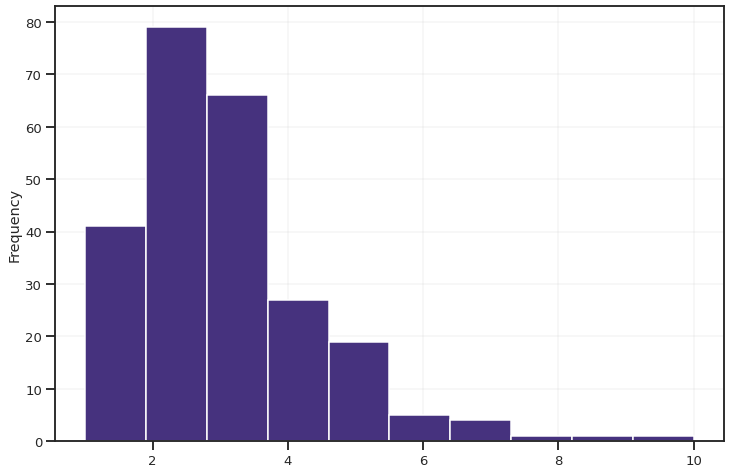

In [ ]:
# matplotlib
df_tips['tip'].plot.hist();

<Axes: ylabel='Frequency'>

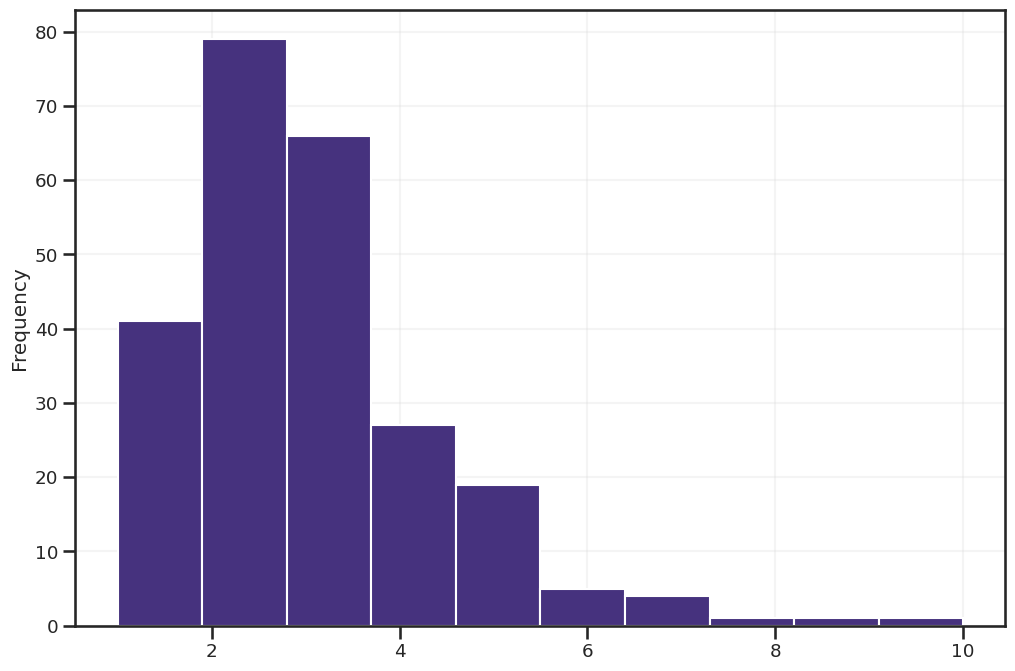

In [44]:
#treinando matplotlib
df_tips['tip'].plot.hist();#pra não informações do código

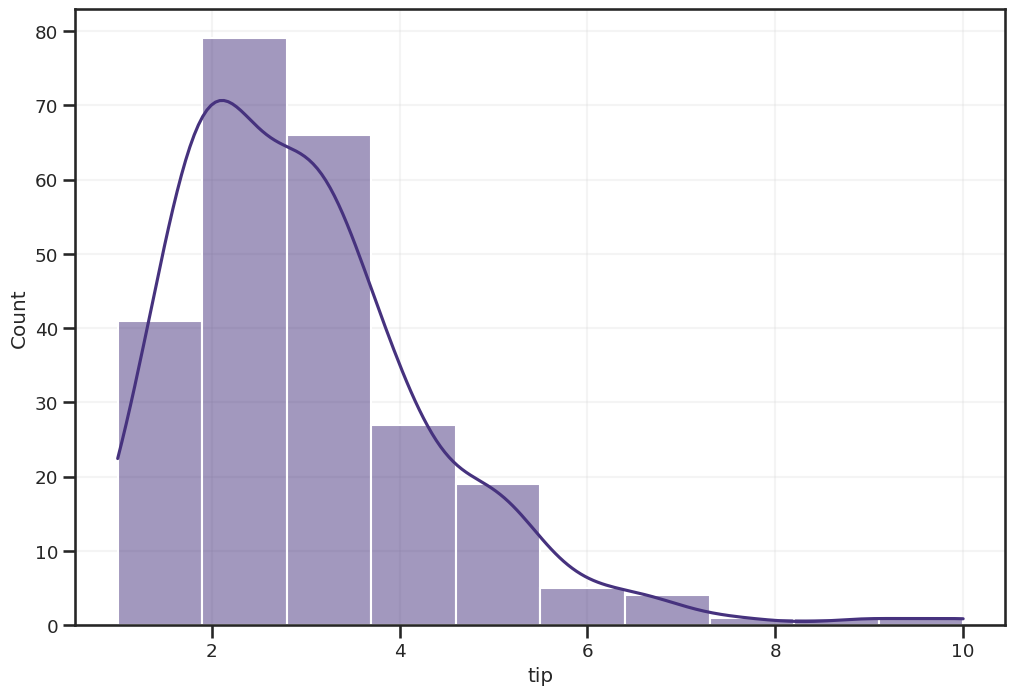

In [45]:
#treinando seaborn
sns.histplot(x=df_tips['tip'],kde=True,bins=10);#bins especifica quantas colunas vão aparecer no gráfico


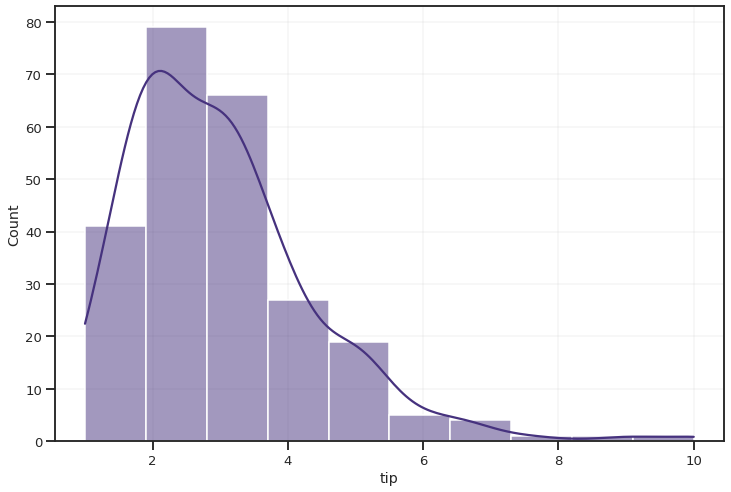

In [ ]:
# seaborn
sns.histplot(x=df_tips['tip'], kde=True, bins=10);

In [ ]:
# plotly
px.histogram(df_tips, x='tip', title='')

In [47]:
#treinando plotly
px.histogram(x=df_tips['tip'])

### Boxplot

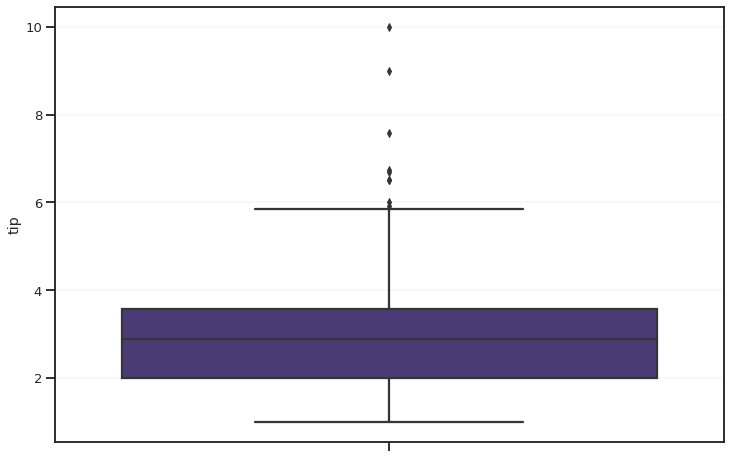

In [ ]:
# seaborn
sns.boxplot(data=df_tips, y='tip')

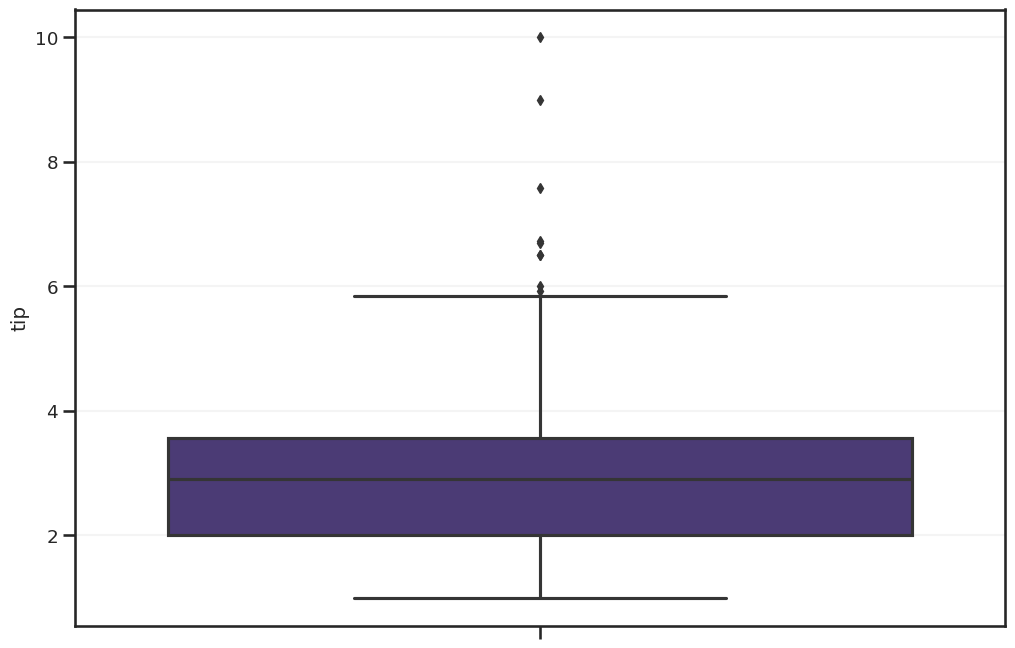

In [48]:
#treinando boxplot seaborn
sns.boxplot(data=df_tips,y='tip');

In [50]:
#treinando backend plotly
px.box(df_tips,y='tip')

In [51]:
#treinando boxplot e histograma juntos 
px.histogram(df_tips,x='tip',marginal='box')

In [ ]:
# plotly backend
px.box(df_tips, y='tip')

In [ ]:
px.histogram(df_tips, x='tip', marginal='rug')

## Variáveis Categóricas

### Tabela de frequências

In [ ]:
# Tabela de frequência absoluta
df_tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [52]:
#treinando tabela de frequência absoluta - variáveis categóricas
df_tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
# Tabela de frequência relativa
df_tips['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [56]:
#treinando Tabela de frequência relativa
(df_tips['day'].value_counts(normalize=True).to_frame('count_pct').rename_axis('day').reset_index())

,day,count_pct
0,Sat,0.356557
1,Sun,0.311475
2,Thur,0.254098
3,Fri,0.077869


In [57]:
#treinando sidetable
df_tips.stb.freq(['day'])

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


In [58]:
#treinando gráfico pizza
df_tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
df_counts=df_tips.stb.freq(['day'])
df_counts

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


([<matplotlib.patches.Wedge at 0x7fa66615b2e0>,
 [Text(0.47909423581850485, 0.990186201280084, 'Sat'),
  Text(-1.0967192869113325, -0.08489290734035711, 'Sun'),
  Text(0.3074340394718734, -1.0561649072820052, 'Thur'),
  Text(1.06724906774893, -0.2664196452760947, 'Fri')],
 [Text(0.26132412862827537, 0.5401015643345912, '36%'),
  Text(-0.598210520133454, -0.04630522218564932, '31%'),
  Text(0.16769129425738546, -0.5760899494265482, '25%'),
  Text(0.5821358551357799, -0.14531980651423346, '8%')])

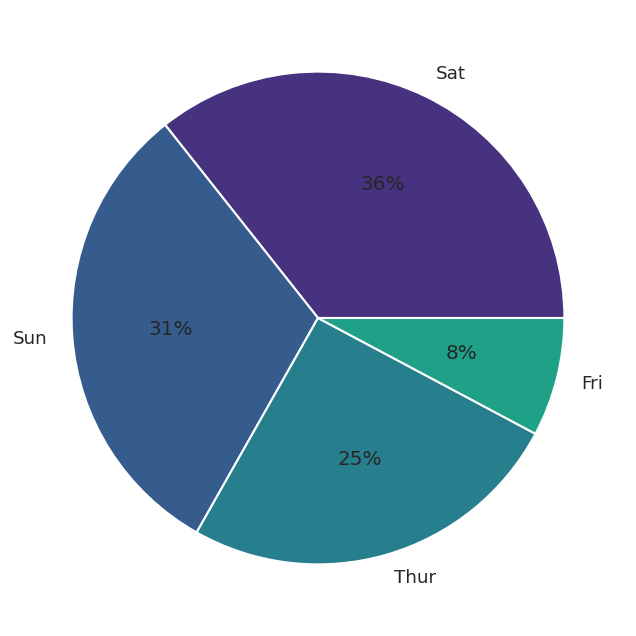

In [65]:
#treinando gráfico pizza
plt.pie(x=df_counts['count'],labels=df_counts.day,autopct='%.0f%%');

In [66]:
#treinando gráfico pizza
px.pie(df_counts, names='day',values='count')

In [68]:
#treinando gráfico de barras
df_counts.head()

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


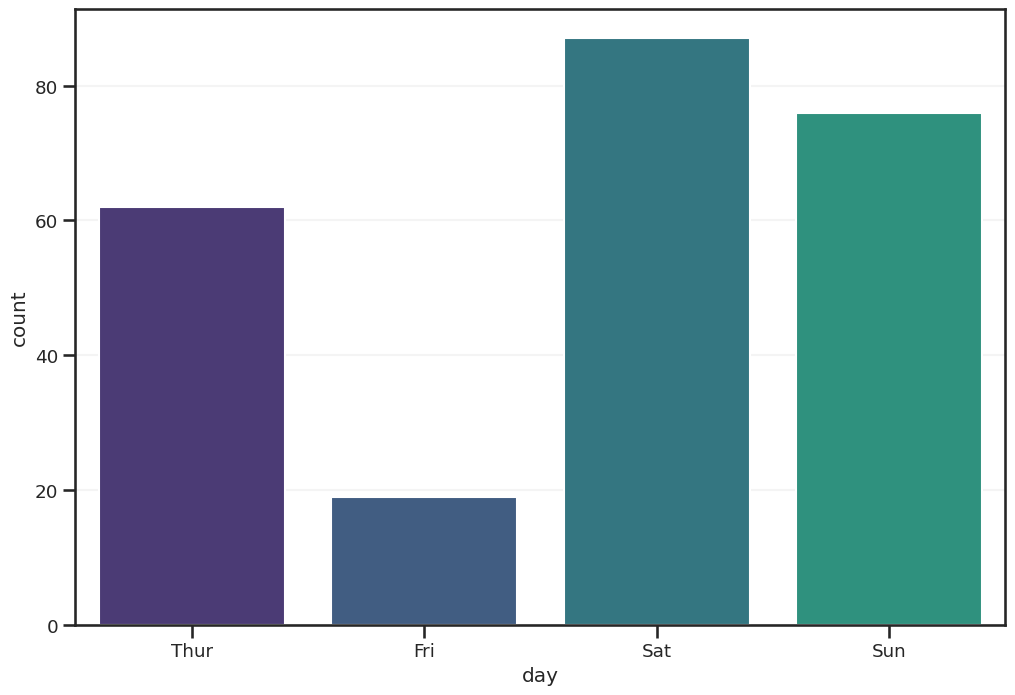

In [69]:
#treinando gráfico de barras
sns.barplot(data=df_counts,x='day',y='count');

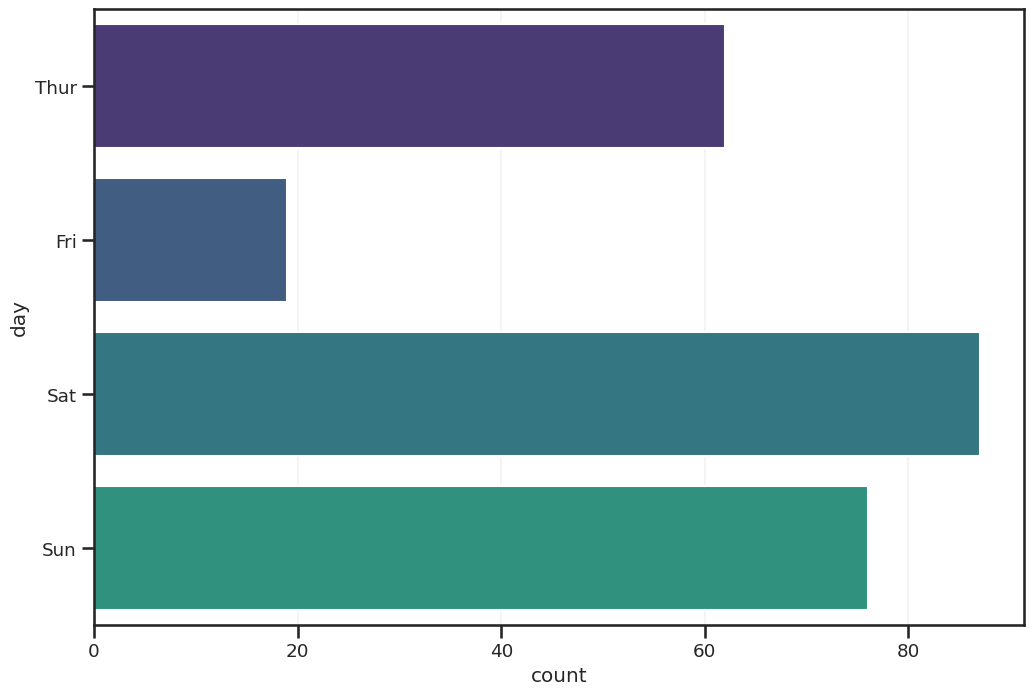

In [75]:
#treinando gráfico de barras
#plotando gráficos de barras horizontal
#plotando gráficos de barras vertical
sns.barplot(data=df_counts,y='day',x='count');

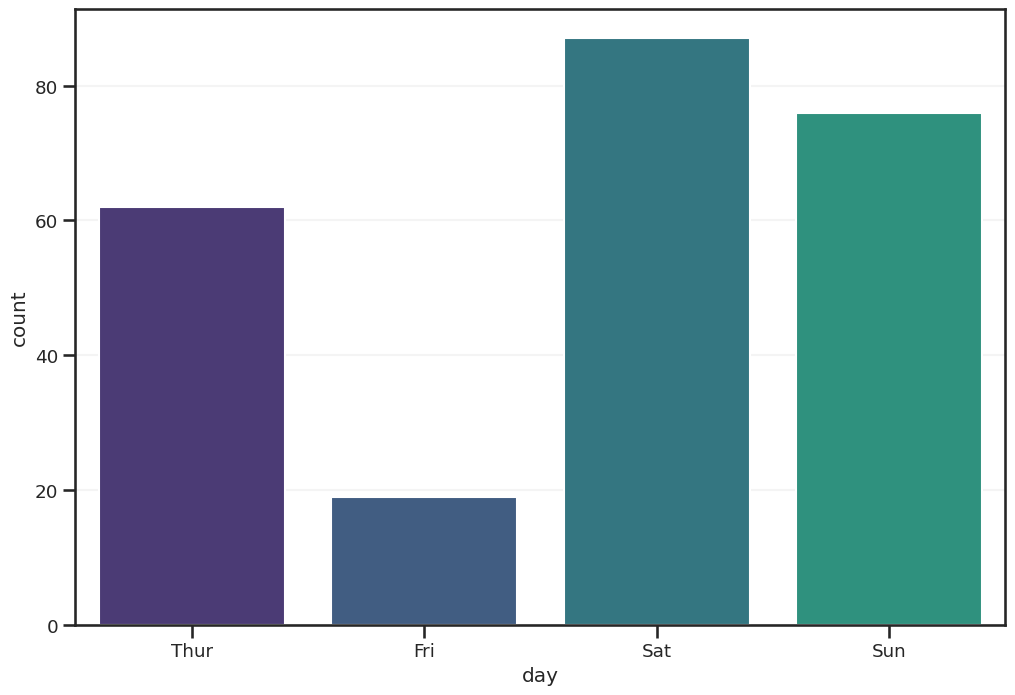

In [77]:
#treinando plotando gráficos de barras diretamente 
sns.countplot(data=df_tips,x='day');

In [ ]:
# Tabela de frequência relativa (dataframe)
(
  df_tips['day']
 .value_counts(normalize=True)
 .to_frame('count_pct')
 .rename_axis('day')
 .reset_index()
)

,day,count_pct
0,Sat,0.356557
1,Sun,0.311475
2,Thur,0.254098
3,Fri,0.077869


In [ ]:
# sidetable
df_tips.stb.freq(['day'])

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


### Gráficos

### Gráfico de pizza

In [102]:
df_counts = df_tips.stb.freq(['day'])
df_counts

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


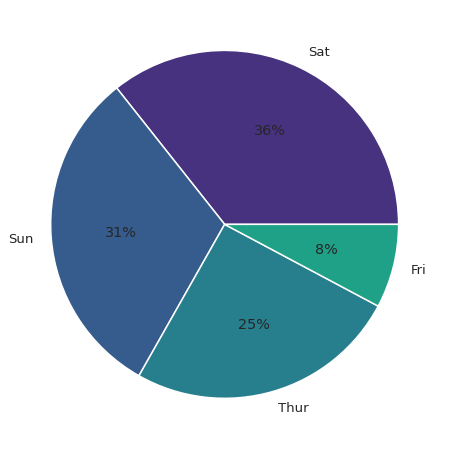

In [ ]:
plt.pie(x=df_counts['count'], labels=df_counts.day, autopct='%.0f%%');

In [ ]:
px.pie(df_counts, names='day', values='count')

### Gráfico de barras

In [ ]:
df_counts.head()

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


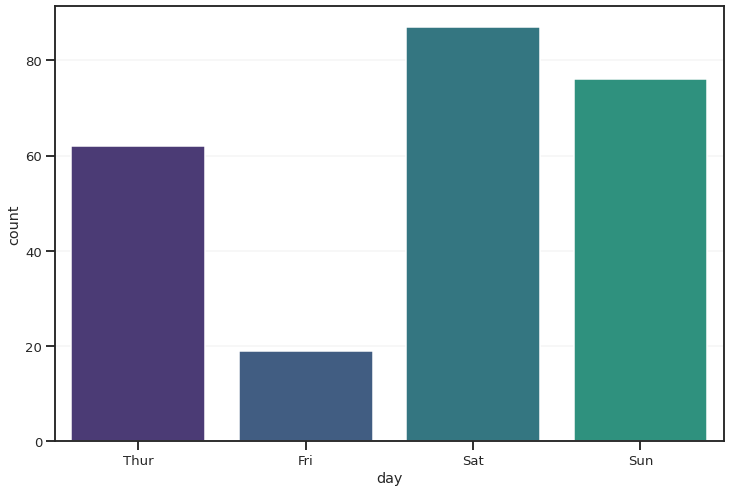

In [ ]:
# Plotando gráficos de barras vertical
sns.barplot(data=df_counts, x='day', y='count');

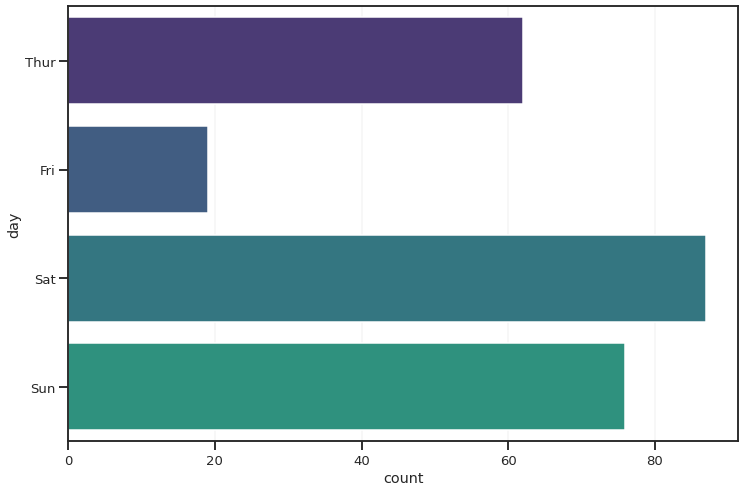

In [ ]:
# Plotando gráficos de barras horizontal
# Plotando gráficos de barras vertical
sns.barplot(data=df_counts, y='day', x='count');

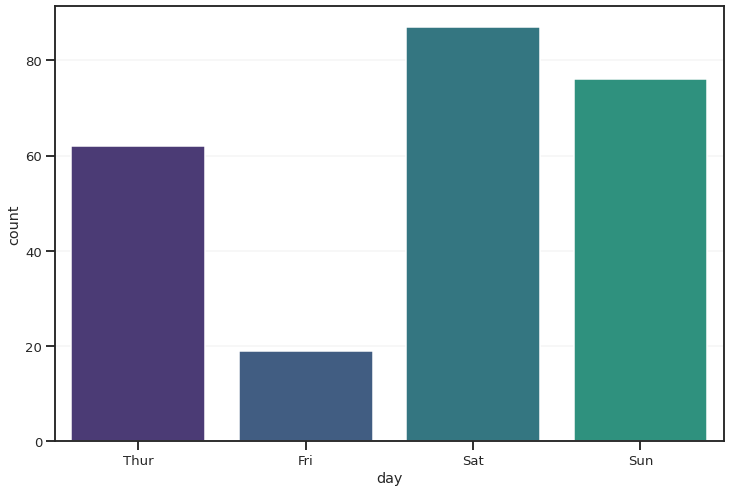

In [ ]:
# Plotando gráficos de barras diretamente
sns.countplot(data=df_tips, x='day');

# Análise Bivariada

![figure book favero](https://github.com/cmcouto-silva/figures/blob/main/statistics/estatisticas_descritivas_bivariadas.png?raw=true)

Fonte: [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/).



In [78]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Medidas de correlação

### Covariância

$$
cov_{x,y} = \frac{\sum{(x_i - \bar{x}) (y_i-\bar{y})}}{n - 1}
$$

In [ ]:
#treinando covariância - vai variando em conjunto ou não
np.cov(df_tips['total_bill'],df_tips['tip'])

In [80]:
#treinando covariância - vai variando em conjunto ou não
pd.DataFrame(
    data=np.cov(df_tips['total_bill'],df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


In [81]:
#treinando correlação 
np.corrcoef(df_tips['total_bill'],df_tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [82]:
#treinando correlação 

pd.DataFrame(
    data=np.corrcoef(df_tips['total_bill'],df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [83]:
#treinando pandas correlation
df_tips.corr()

<ipython-input-83-1c3c15ccc9cb>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [79]:
np.cov(df_tips['total_bill'], df_tips['tip'])

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [ ]:
pd.DataFrame(
    data=np.cov(df_tips['total_bill'], df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


### Correlação

$$
r = \frac{\sum{(x_i - \bar{x}) (y_i-\bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2} }}
$$

In [ ]:
np.corrcoef(df_tips['total_bill'], df_tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [ ]:
pd.DataFrame(
    data=np.corrcoef(df_tips['total_bill'], df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [ ]:
# Pandas correlation
df_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Medidas de associação

### Chi-quadrado

Mede associação entre duas variáveis categóricas:

$$
\chi^2 = \sum{\frac{(O_i - E_i)^2}{E_i}}
$$

In [85]:
#treinando medidas de associação
#chi quadrado - mede associação entre duas variáveis categóricas
crosstab=pd.crosstab(df_tips['sex'],df_tips['smoker'])

In [90]:
#treinando medidas de associação
chi2,p,dof,expected=stats.chi2_contingency(crosstab)
print(chi2,p)

0.0 1.0


In [91]:
#treinando cramer's V
stats.contingency.association(crosstab)

0.0028159517336962033

In [ ]:
crosstab = pd.crosstab(df_tips['sex'], df_tips['smoker'])
crosstab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

In [ ]:
print(chi2, p)

0.0 1.0


Cramer's V

Coeficiente de associação baseado no $\chi^2$ que varia de 0 a 1, sendo 0 associação mínimas e 1 associação máxima:

$$
V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}}
$$

In [ ]:
stats.contingency.association(crosstab)

0.0028159517336962033

## Gráficos

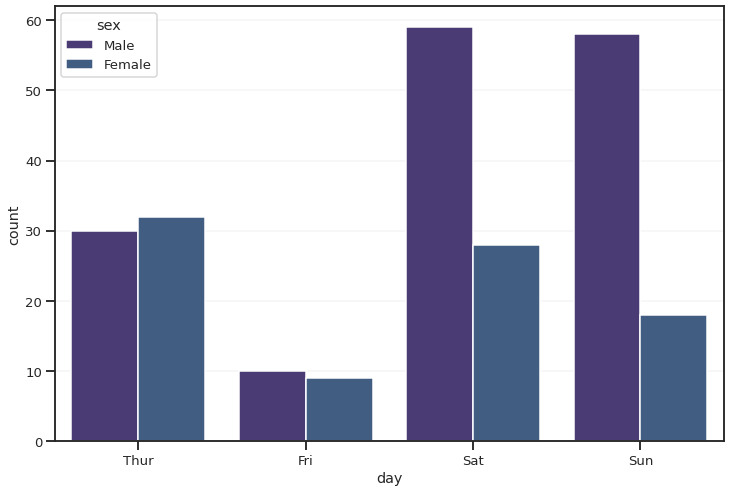

In [ ]:
# Countplot com outra variável (seaborn)
sns.countplot(data=df_tips, x='day', hue='sex');

<Axes: xlabel='day', ylabel='count'>

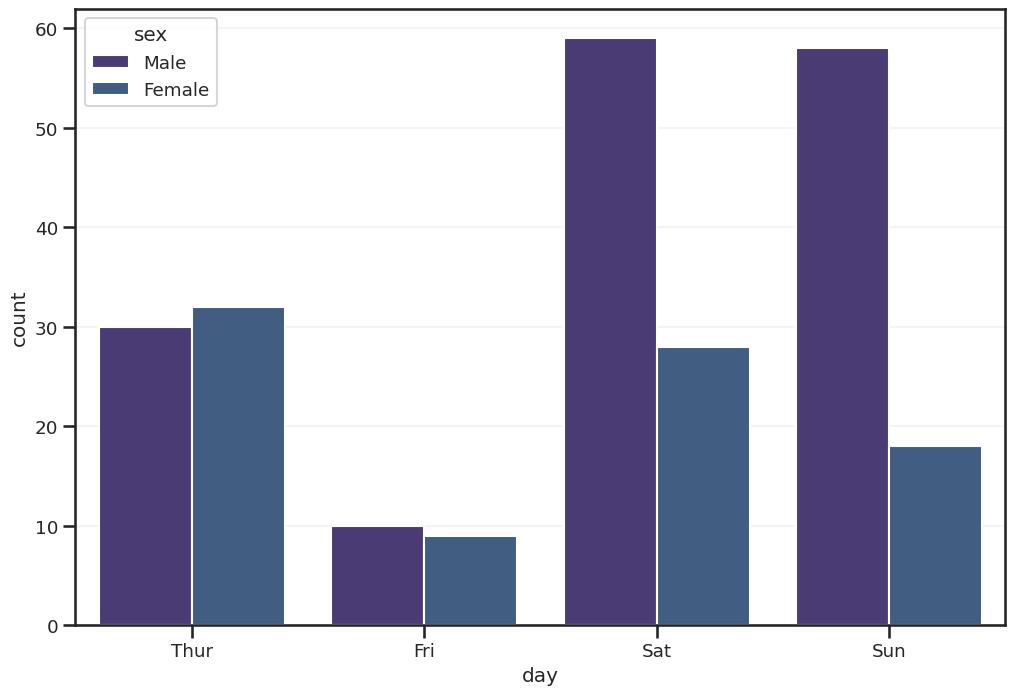

In [93]:
#treinando countplot com outra variavel (seaborn)
sns.countplot(data=df_tips,x='day',hue='sex')

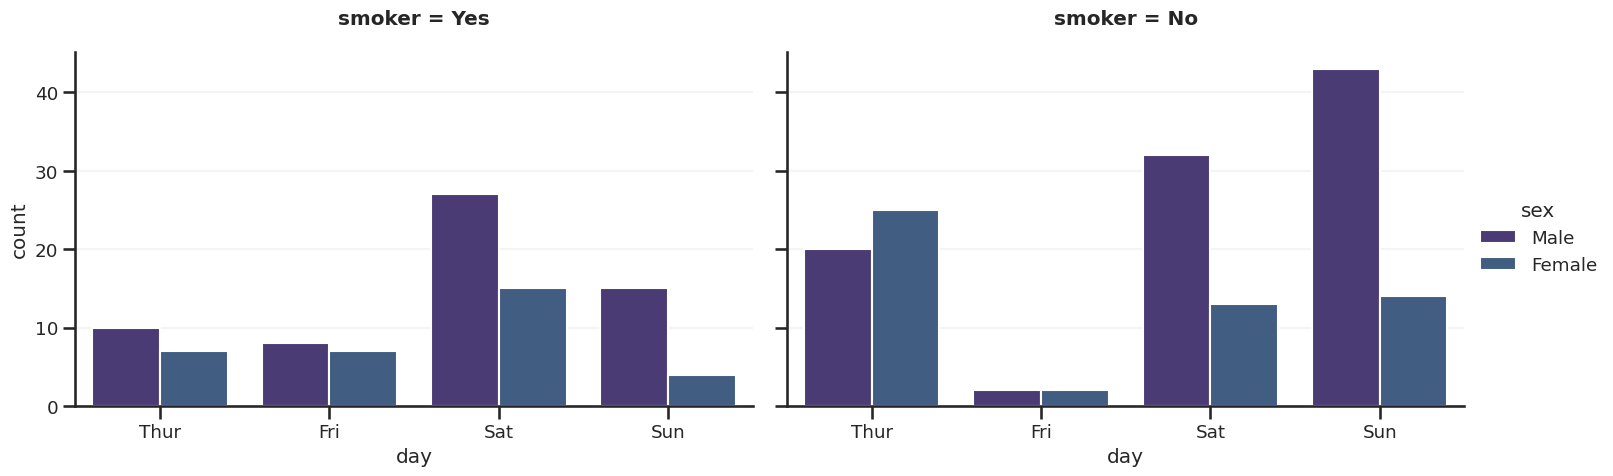

In [98]:
#treinando catplot com outra variavel (seaborn)
sns.catplot(data=df_tips,x='day',hue='sex',kind='count', col='smoker',aspect=1.5);

In [99]:
#treinando tabela de fraq(stb)
df_tips.stb.freq(['day','sex'])

,day,sex,count,percent,cumulative_count,cumulative_percent
0,Sat,Male,59,24.180328,59,24.180328
1,Sun,Male,58,23.770492,117,47.950820
2,Thur,Female,32,13.114754,149,61.065574
3,Thur,Male,30,12.295082,179,73.360656
4,Sat,Female,28,11.475410,207,84.836066
5,Sun,Female,18,7.377049,225,92.213115
6,Fri,Male,10,4.098361,235,96.311475
7,Fri,Female,9,3.688525,244,100.000000


In [116]:
#treinando countplot com outra variavel(plotly)

px.bar(df_counts,x='day',y='count',color='sex',barmode='group')

<Axes: xlabel='total_bill', ylabel='tip'>

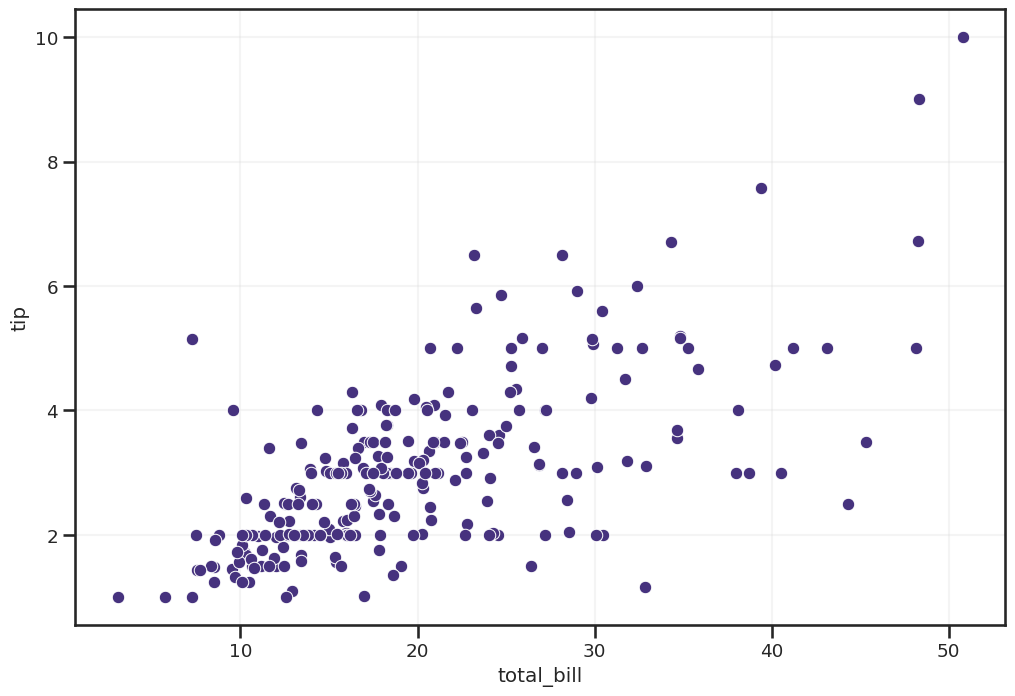

In [117]:
#treinando scatterplot
sns.scatterplot(data=df_tips,x='total_bill',y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

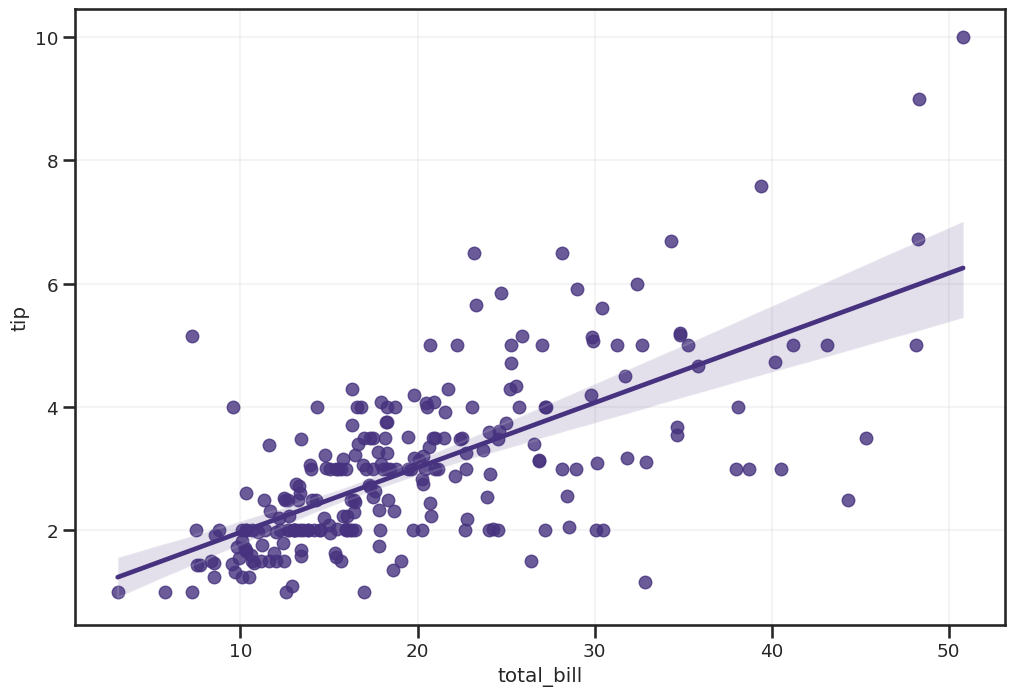

In [118]:
#treinando lmplot
sns.regplot(data=df_tips,x='total_bill',y='tip')

<function matplotlib.pyplot.show(close=None, block=None)>

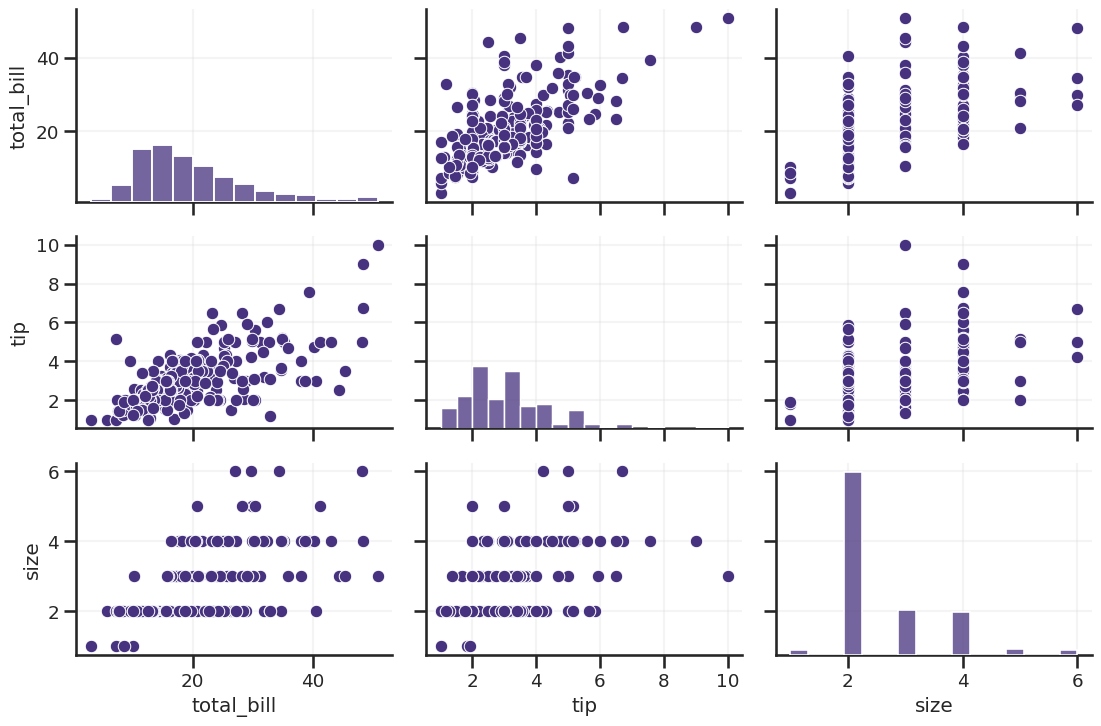

In [120]:
#treinando pairplot
sns.pairplot(data=df_tips,aspect=1.5)
plt.tight_layout()
plt.show

In [121]:
#treinando heatmap(correlation)
dfc=df_tips.corr()
dfc

<ipython-input-121-9fe094007d2b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

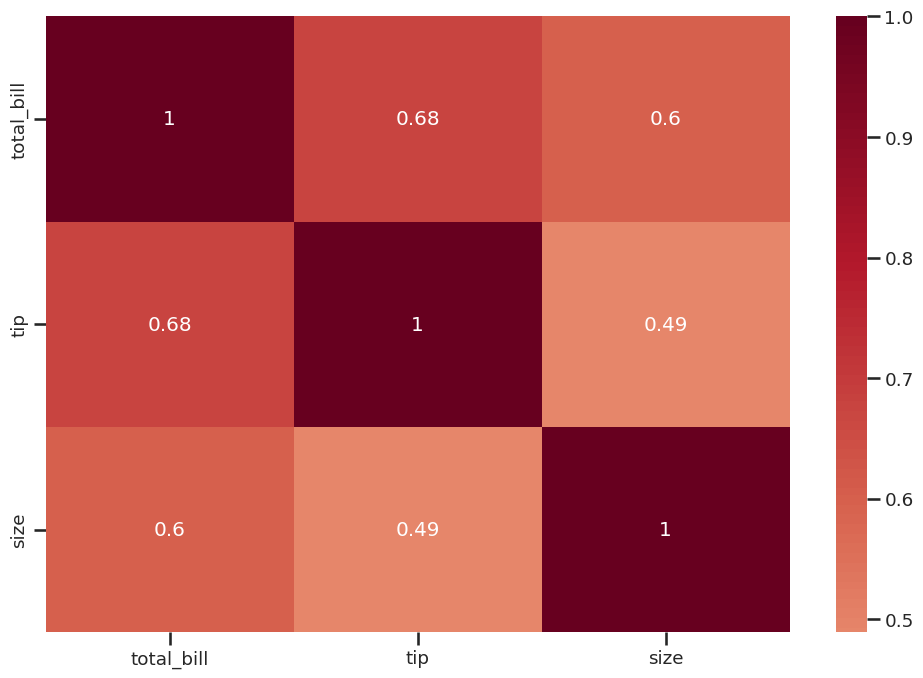

In [122]:
#treinando heatmap(correlation)
sns.heatmap(dfc,annot=True,cmap='RdBu_r',center=0)

<Axes: xlabel='day', ylabel='tip'>

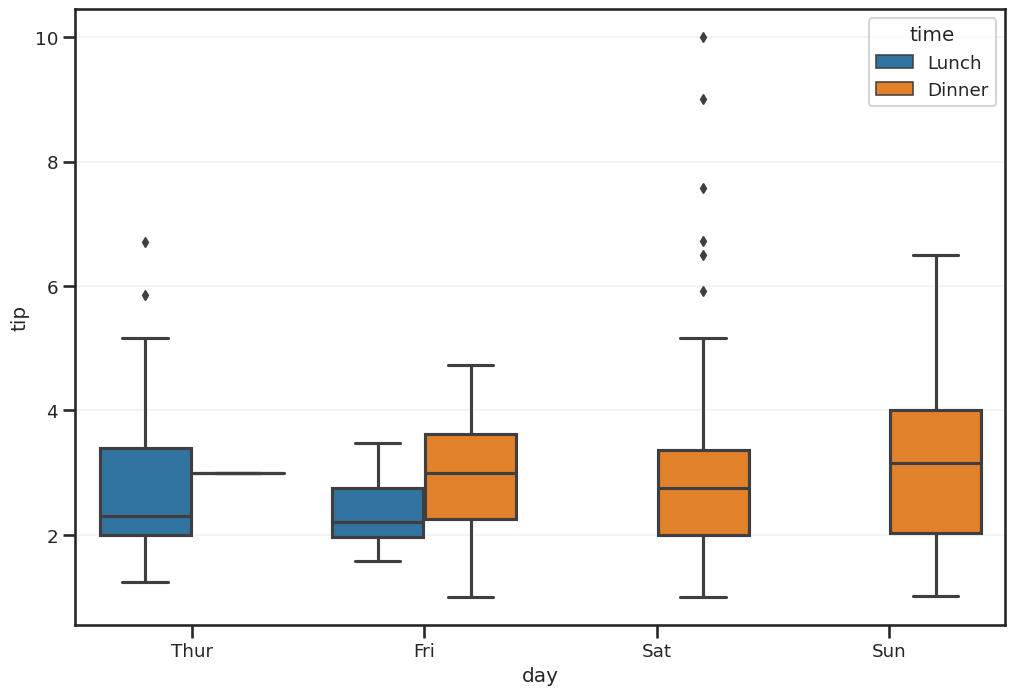

In [127]:
#treinando baxplot day - total_bill
sns.boxplot(data=df_tips,x='day',y='tip',hue='time',palette='tab10')

<Axes: xlabel='day', ylabel='tip'>

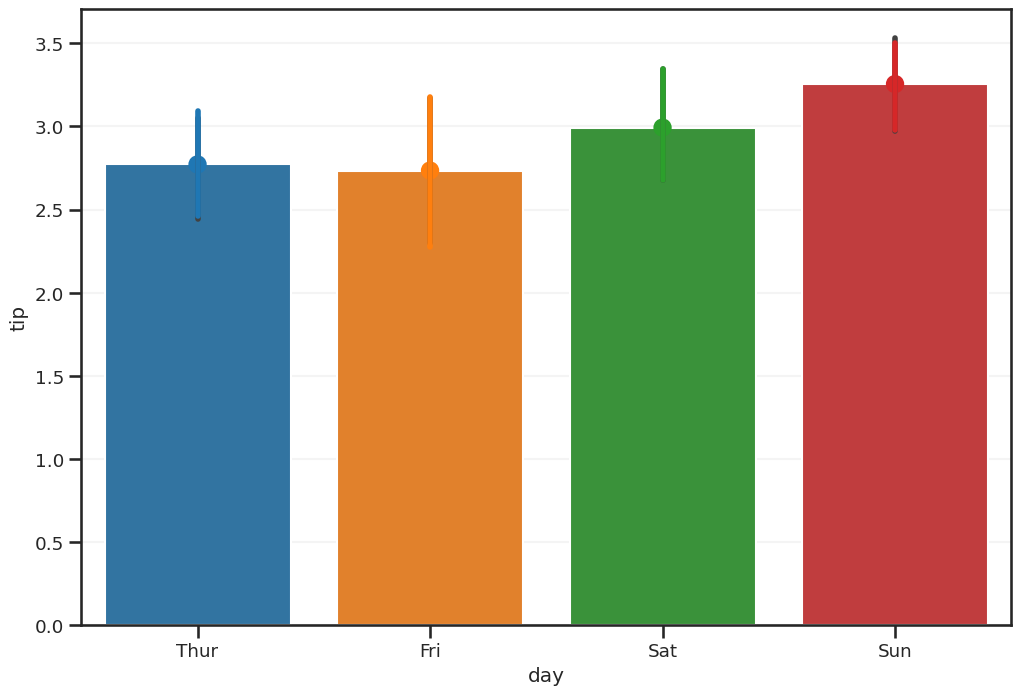

In [129]:
#treinando barplot day - total_bill
sns.barplot(data=df_tips,x='day',y='tip',palette='tab10')
sns.pointplot(data=df_tips,x='day',y='tip',palette='tab10')

<Axes: xlabel='tip', ylabel='Count'>

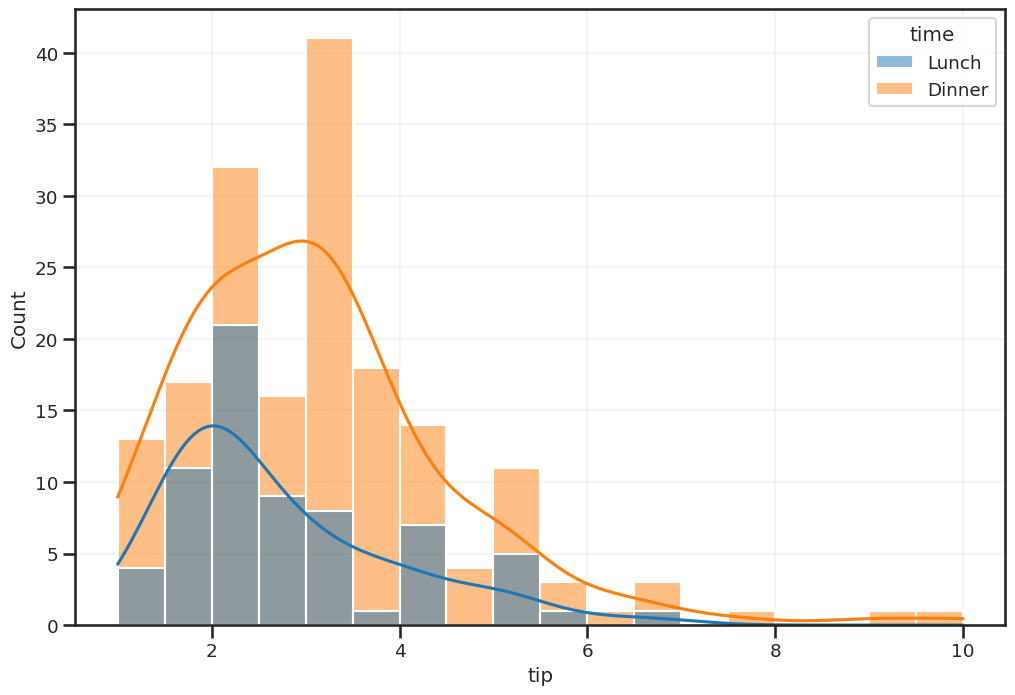

In [5]:
#treinando histograma- total_bill - sex
sns.histplot(data=df_tips,x='tip',hue='time',palette='tab10',kde=True)

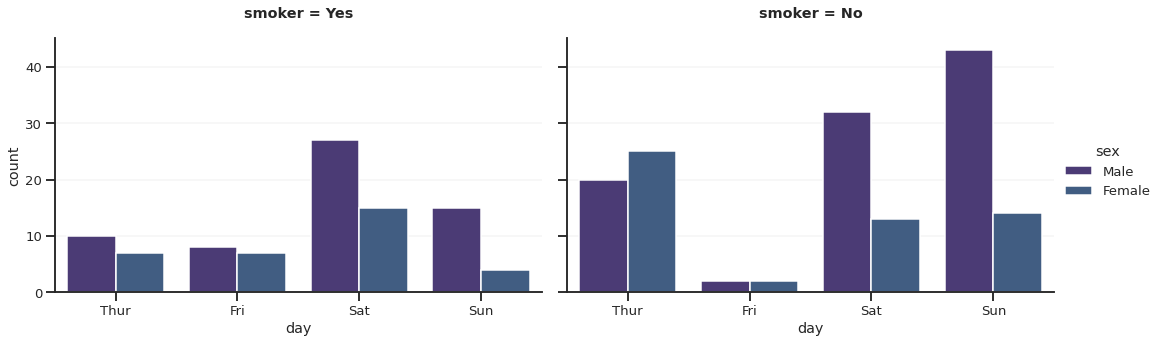

In [ ]:
sns.catplot(data=df_tips, x='day', hue='sex', kind='count', col='smoker', aspect=1.5);

In [113]:
# Tabela de freq (stb)
df_counts = df_tips.stb.freq(['day','sex'])
df_counts

,day,sex,count,percent,cumulative_count,cumulative_percent
0,Sat,Male,59,24.180328,59,24.180328
1,Sun,Male,58,23.770492,117,47.950820
2,Thur,Female,32,13.114754,149,61.065574
3,Thur,Male,30,12.295082,179,73.360656
4,Sat,Female,28,11.475410,207,84.836066
5,Sun,Female,18,7.377049,225,92.213115
6,Fri,Male,10,4.098361,235,96.311475
7,Fri,Female,9,3.688525,244,100.000000


In [114]:
# Countplot com outra variável (plotly)
px.bar(df_counts, x='day', y='count', color='sex', barmode='group')

### Variáveis numéricas

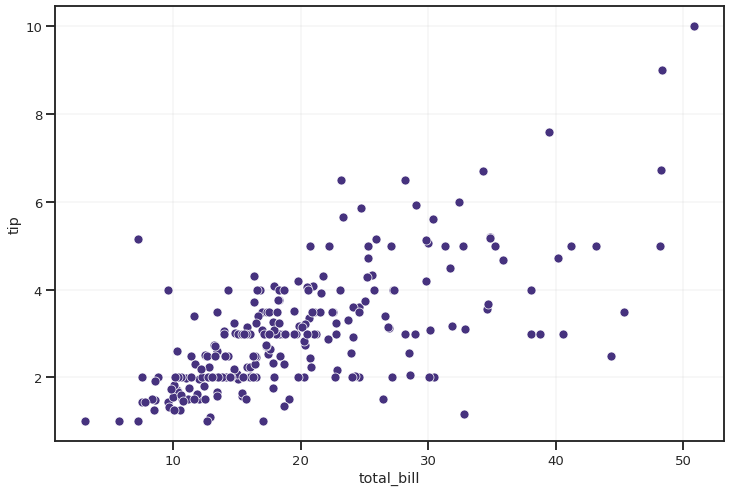

In [ ]:
# Scatterplot
sns.scatterplot(data=df_tips, x='total_bill', y='tip');

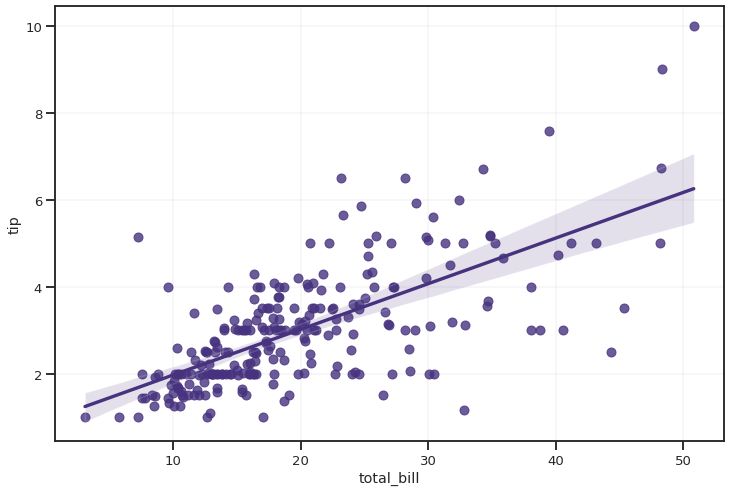

In [ ]:
# Lmplot
sns.regplot(data=df_tips, x='total_bill', y='tip');

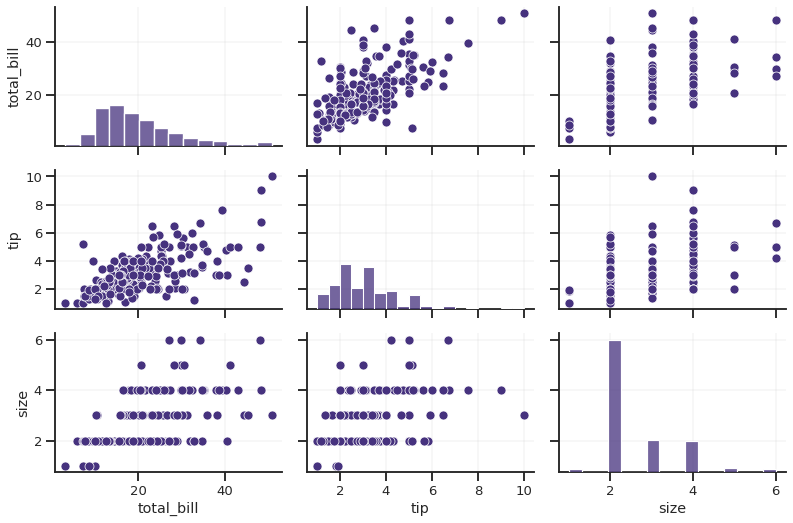

In [ ]:
# Pairplot
sns.pairplot(data=df_tips, aspect=1.5)
plt.tight_layout()
plt.show()

In [ ]:
# Heatmap (correlation)
dfc = df_tips.corr()
dfc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


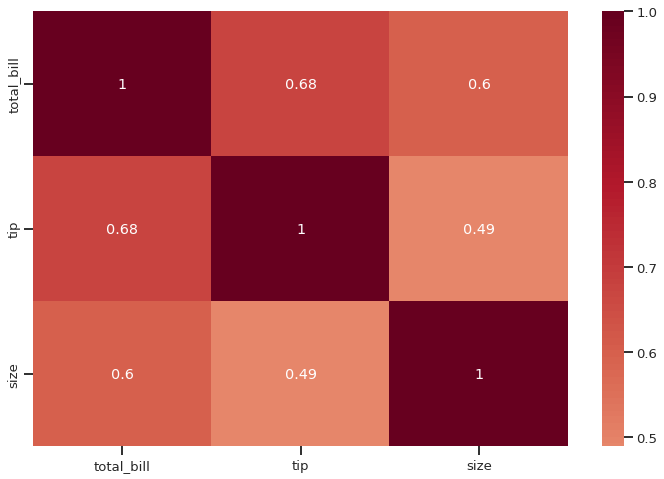

In [ ]:
sns.heatmap(dfc, annot=True, cmap='RdBu_r', center=0);

### Variáveis numéricas + categóricas

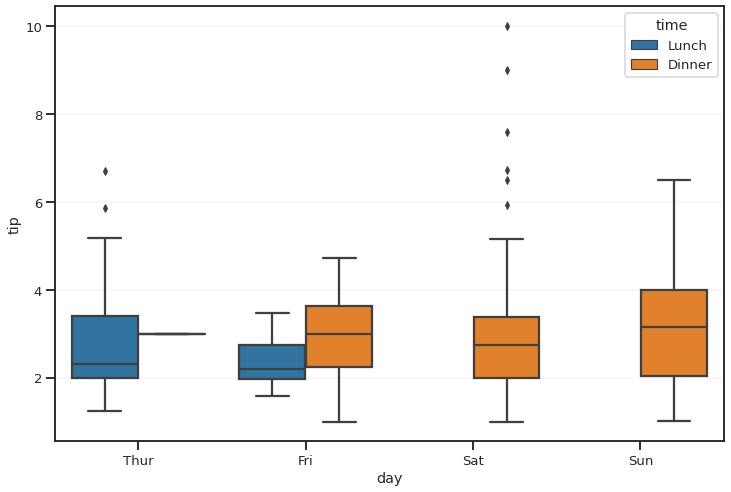

In [ ]:
# Boxplot day - total_bill
sns.boxplot(data=df_tips, x='day', y='tip', hue='time', palette='tab10');

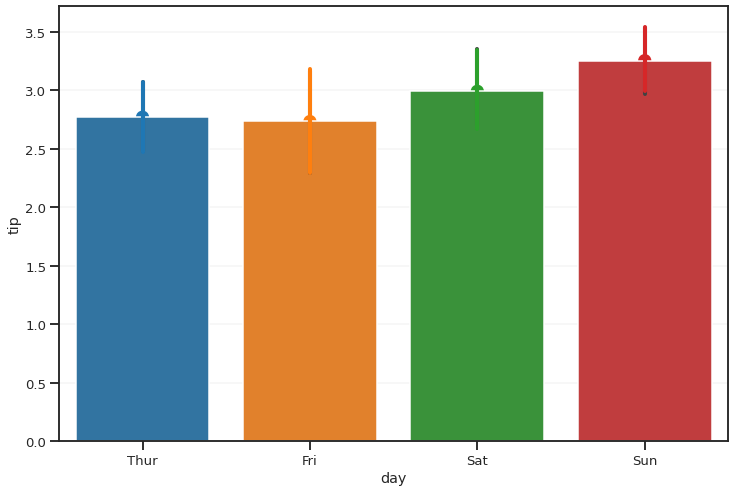

In [ ]:
# Barplot/pointplot day - total_bill
sns.barplot(data=df_tips, x='day', y='tip', palette='tab10')
sns.pointplot(data=df_tips, x='day', y='tip', palette='tab10')

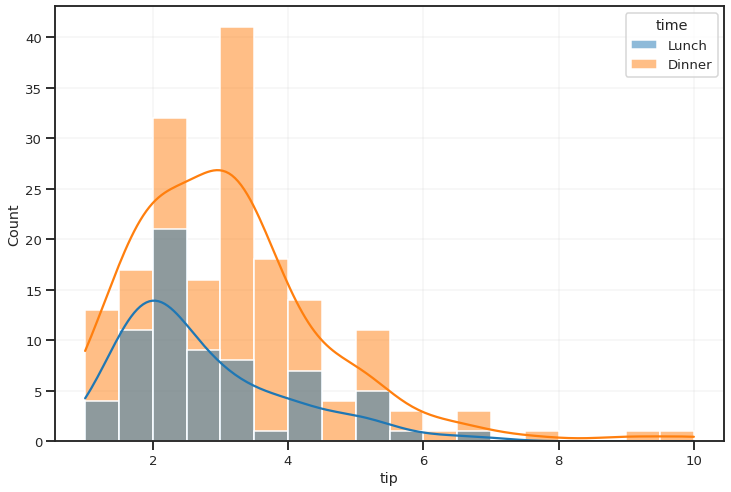

In [ ]:
# Histograma total_bill - sex
sns.histplot(data=df_tips, x='tip', hue='time', palette='tab10', kde=True);

**E as variáveis categóricas?**

É possível plotar matriz de coeficientes de Cramer como fizemos, além dos mapas perceptuais e diagramas de Sankey. 

Sugestão de leitura nestes tópicos (notebooks):
- [PyData Talk](https://github.com/cmcouto-silva/Talks/blob/main/PyData/pydata_20220625.ipynb)
- [Kaggle](https://www.kaggle.com/code/cmcoutosilva/an-lise-de-correspond-ncia-c-mara-dos-deputados)

# Referências bibliográficas

- [Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python](https://www.amazon.com.br/Practical-Statistics-Data-Scientists-2e/dp/149207294X) (Capítulo 1).
- [Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®](https://www.amazon.com.br/Manual-An%C3%A1lise-Dados-Luiz-F%C3%A1vero/dp/8535270876/)  (Capítulos 1-3).
